<a href="https://colab.research.google.com/github/Labs123355/hey_world/blob/main/Evaluation_of_Clustering_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

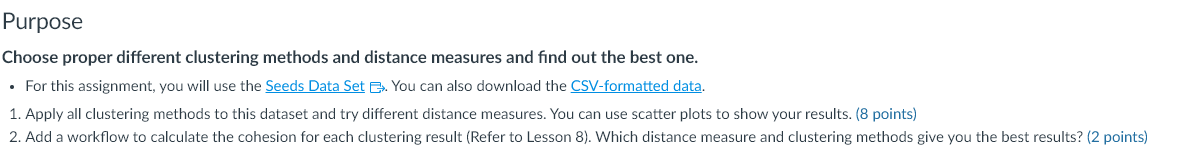

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/seeds_dataset.txt'
columns = [ f'Attributes_{i + 1}' for i in range(8) ]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(file_path, delim_whitespace=True, names= columns )
df.tail()


Attributes_1  Attributes_2  Attributes_3  Attributes_4  Attributes_5  \
205         12.19         13.20        0.8783         5.137         2.981   
206         11.23         12.88        0.8511         5.140         2.795   
207         13.20         13.66        0.8883         5.236         3.232   
208         11.84         13.21        0.8521         5.175         2.836   
209         12.30         13.34        0.8684         5.243         2.974   

     Attributes_6  Attributes_7  Attributes_8  
205         3.631         4.870             3  
206         4.325         5.003             3  
207         8.315         5.056             3  
208         3.598         5.044             3  
209         5.637         5.063             3

In [4]:

# we are doing this so are test matches our predictions for better accuracy are cluster use 0-100
data = df.replace([1, 2, 3], [0, 1, 2])

data.tail()

Attributes_1  Attributes_2  Attributes_3  Attributes_4  Attributes_5  \
205         12.19         13.20        0.8783         5.137         2.981   
206         11.23         12.88        0.8511         5.140         2.795   
207         13.20         13.66        0.8883         5.236         3.232   
208         11.84         13.21        0.8521         5.175         2.836   
209         12.30         13.34        0.8684         5.243         2.974   

     Attributes_6  Attributes_7  Attributes_8  
205         3.631         4.870             2  
206         4.325         5.003             2  
207         8.315         5.056             2  
208         3.598         5.044             2  
209         5.637         5.063             2

In [5]:
X = data.drop(columns=['Attributes_8'], axis=1)
y = data['Attributes_8']

## Choosing the right K

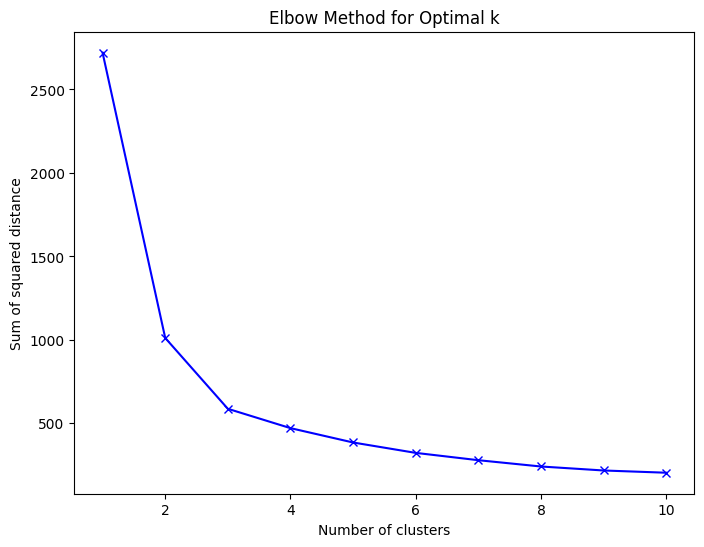

In [8]:
#Plot the sum of squared distances from each point to its assigned cluster center (inertia) as a function of 𝑘
from sklearn.cluster import KMeans
inertia = []
kmax = 11
K = range(1, kmax)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for Optimal k')
plt.show()


In [9]:
data.describe()

Attributes_1  Attributes_2  Attributes_3  Attributes_4  Attributes_5  \
count    210.000000    210.000000    210.000000    210.000000    210.000000   
mean      14.847524     14.559286      0.870999      5.628533      3.258605   
std        2.909699      1.305959      0.023629      0.443063      0.377714   
min       10.590000     12.410000      0.808100      4.899000      2.630000   
25%       12.270000     13.450000      0.856900      5.262250      2.944000   
50%       14.355000     14.320000      0.873450      5.523500      3.237000   
75%       17.305000     15.715000      0.887775      5.979750      3.561750   
max       21.180000     17.250000      0.918300      6.675000      4.033000   

       Attributes_6  Attributes_7  Attributes_8  
count    210.000000    210.000000    210.000000  
mean       3.700201      5.408071      1.000000  
std        1.503557      0.491480      0.818448  
min        0.765100      4.519000      0.000000  
25%        2.561500      5.045000      0.000000  
50%        3.599000      5.223000      1.000000  
75%        4.768750      5.877000      2.000000  
max        8.456000      6.550000      2.000000

In [10]:
def graph( name, model_var):
  ''' Graphs Scatter plot of our Original Data and Clustered data
    Inputs: name, model_var
    Outputs: Scatter plot of Original Data and Clustered Data
  '''
  fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
  # Plot the original data
  ax1.set_title('Original Data')
  scatter = ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c= y, cmap='viridis')

  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')

  # Plot the k-means clustered data
  ax2.set_title(name)
  scatter = ax2.scatter(data.iloc[:, 0], data.iloc[:, 1], c= model_var.labels_, cmap='rainbow')

  ax2.set_xlabel('X')
  ax2.set_ylabel('Y')

  plt.tight_layout()

  plt.show()



In [11]:
#confusion Matrix
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluation(test, pred, name):
  ''' Provides evaluation metrics for a model. Outputs precision, accuracy, recall, and confusion matrix.

      Inputs: test, pred, name
      Outputs: Confusion Matrix, Classification Report, Name of model
  '''

  print(f'Evaluation for {name}\n')
  print(classification_report(test, pred))

  cm = metrics.confusion_matrix(test, pred)
  cm_display = metrics.ConfusionMatrixDisplay(cm)

  cm_display.plot()
  plt.show()

In [12]:
K = 3
k = K

In [13]:
from sklearn.cluster import KMeans


# Use the first k rows as initial centers
initial_centers = X.iloc[:k].values

kmeans = KMeans(n_clusters=k, max_iter= 99, init= initial_centers )
kmeans.fit(X)

KMeans(init=array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ]]),
       max_iter=99, n_clusters=3)

Note: For our K means we are only using the first two columns. This could be why accuracy is not so good

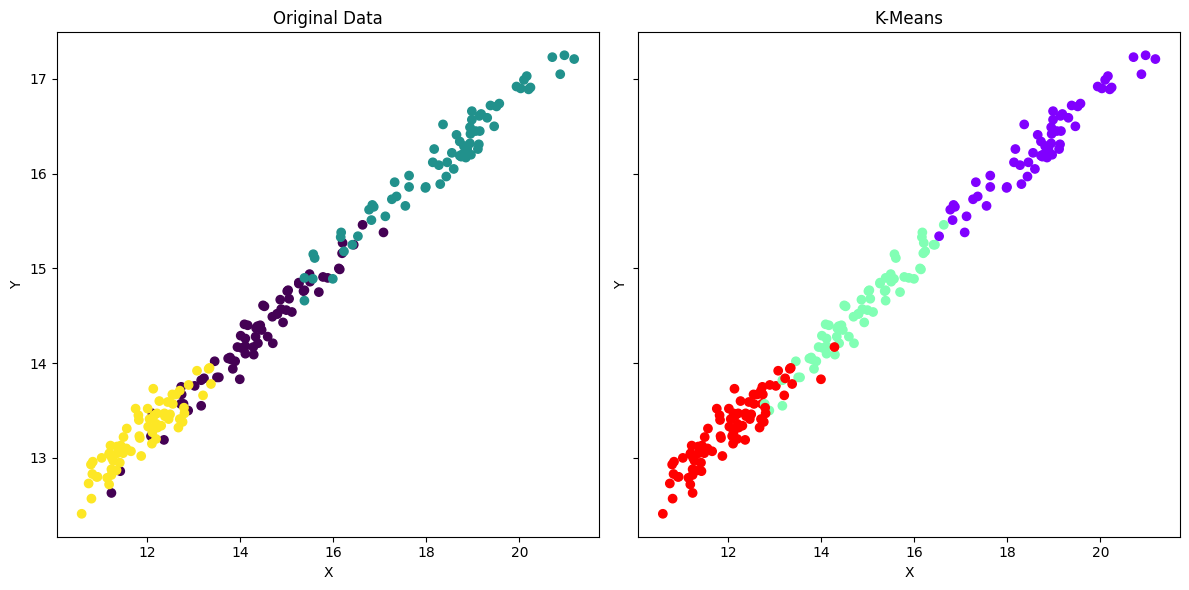

In [14]:
graph('K-Means', kmeans)


## Evaluation of K-Means

Evaluation for K-Means

              precision    recall  f1-score   support

           0       0.02      0.01      0.02        70
           1       0.15      0.14      0.15        70
           2       0.85      1.00      0.92        70

    accuracy                           0.39       210
   macro avg       0.34      0.39      0.36       210
weighted avg       0.34      0.39      0.36       210



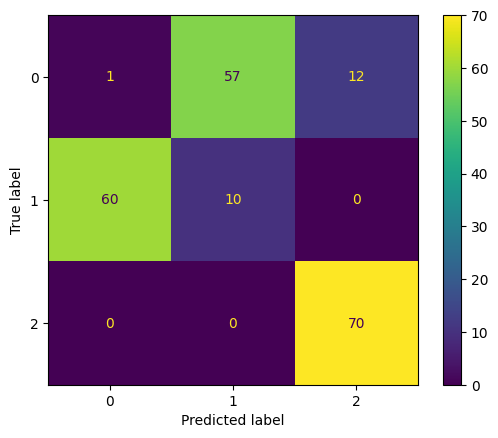

In [15]:
evaluation(y, kmeans.labels_, 'K-Means')

## Kmedoids (Euclidean)

In [18]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.8 MB/s eta 0:00:00


In [19]:
from sklearn_extra.cluster import KMedoids


kmedoid_E = KMedoids(n_clusters=k, metric='euclidean' )


kmedoid_E.fit(X)

KMedoids(n_clusters=3)

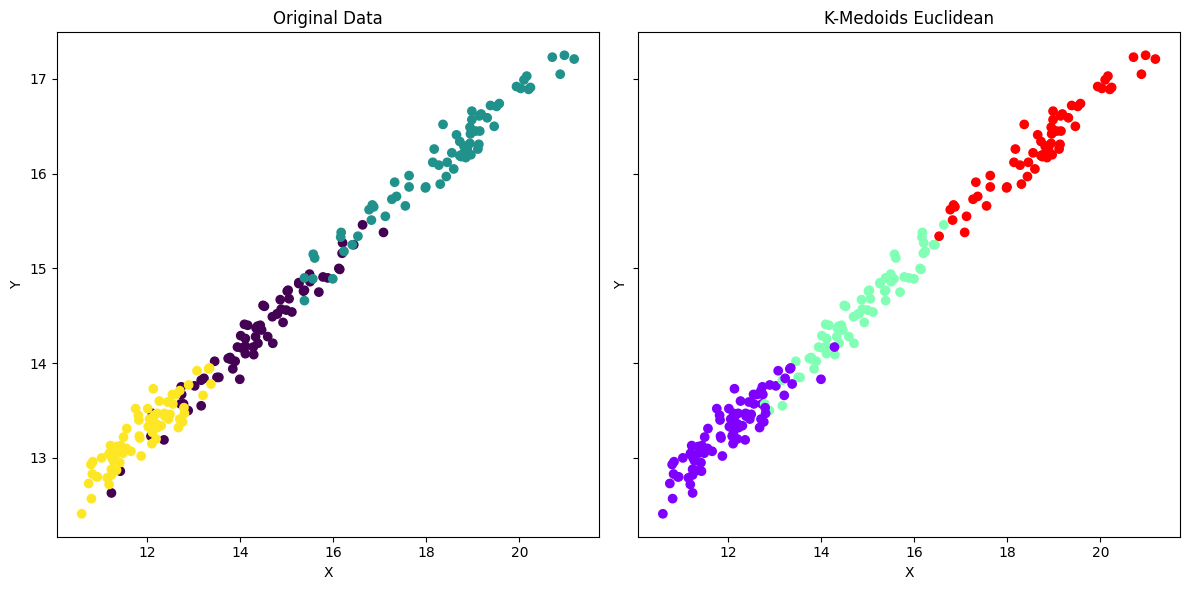

In [20]:

graph('K-Medoids Euclidean', kmedoid_E)

##Evaluation of K-Medoids

Evaluation for K-Medoids (Euclidean)

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        70
           1       0.15      0.14      0.15        70
           2       0.00      0.00      0.00        70

    accuracy                           0.10       210
   macro avg       0.10      0.10      0.10       210
weighted avg       0.10      0.10      0.10       210



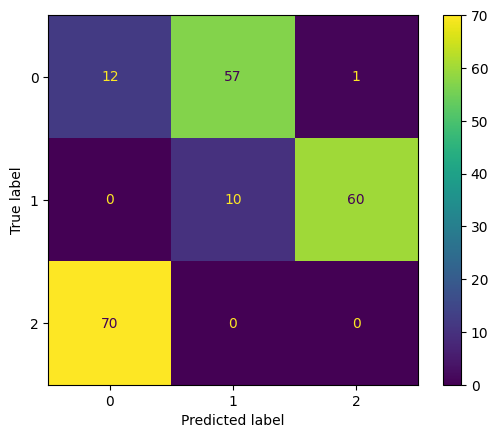

In [21]:
evaluation(y, kmedoid_E.labels_, 'K-Medoids (Euclidean)')

K Medoids Manhattan

In [22]:
kmedoid_M = KMedoids(n_clusters=k, metric='manhattan' )
kmedoid_M.fit(X)

KMedoids(metric='manhattan', n_clusters=3)

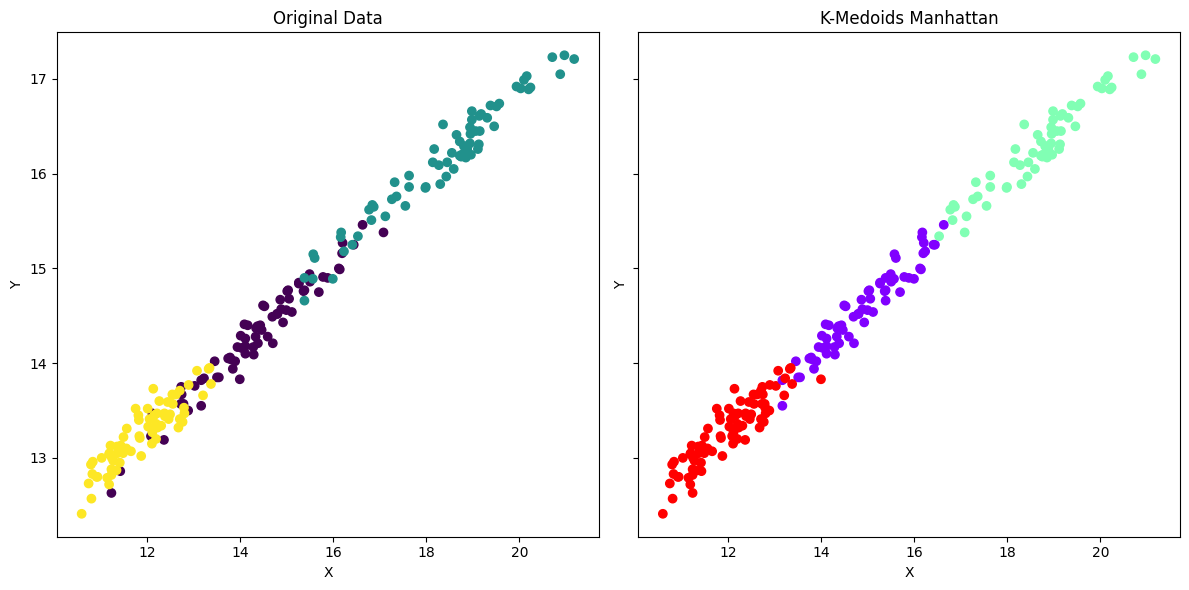

In [23]:
graph('K-Medoids Manhattan', kmedoid_M)

Evaluation for K-Medoids (Manhattan)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        70
           1       0.98      0.86      0.92        70
           2       0.84      1.00      0.92        70

    accuracy                           0.89       210
   macro avg       0.89      0.89      0.88       210
weighted avg       0.89      0.89      0.88       210



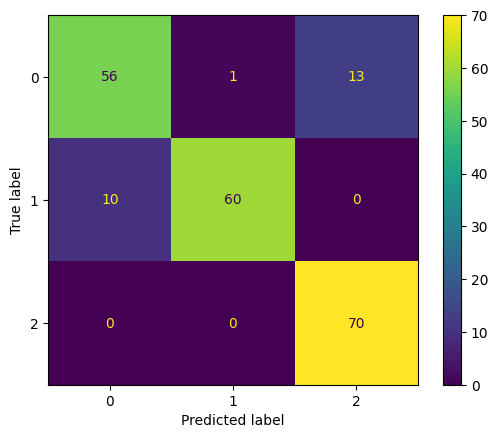

In [24]:
evaluation(y, kmedoid_M.labels_, 'K-Medoids (Manhattan)')


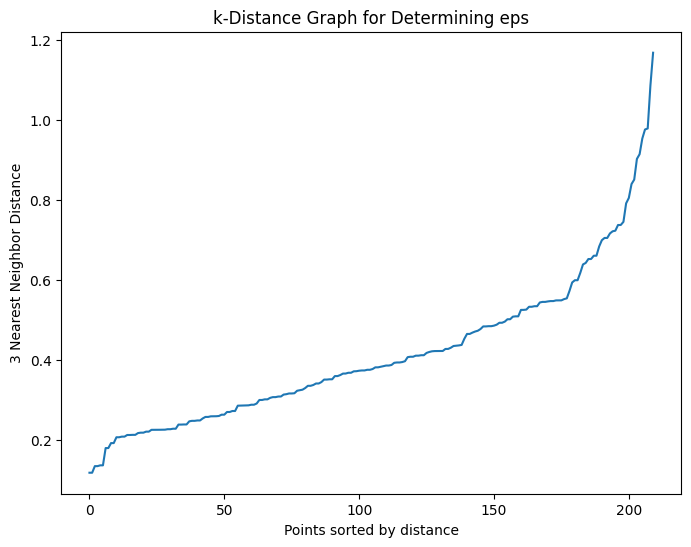

'Link: to code help: https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan'

In [25]:
from sklearn.neighbors import NearestNeighbors

# Compute the k-nearest neighbors
 # Typically, k is chosen as the dimensionality of the data
nbrs = NearestNeighbors(n_neighbors= k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances to the k-th nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k} Nearest Neighbor Distance')
plt.title('k-Distance Graph for Determining eps')
plt.show()

'''Link: to code help: https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan'''

In [26]:
from sklearn.cluster import DBSCAN

#min_sample is usually length of attributes plus 1 so 7 Att + 1
DBSCAN_model  = DBSCAN(eps= 0.7, min_samples= 8 , metric='euclidean' )
DBSCAN_model.fit(X)

#To optmize eps we could

DBSCAN(eps=0.7, min_samples=8)

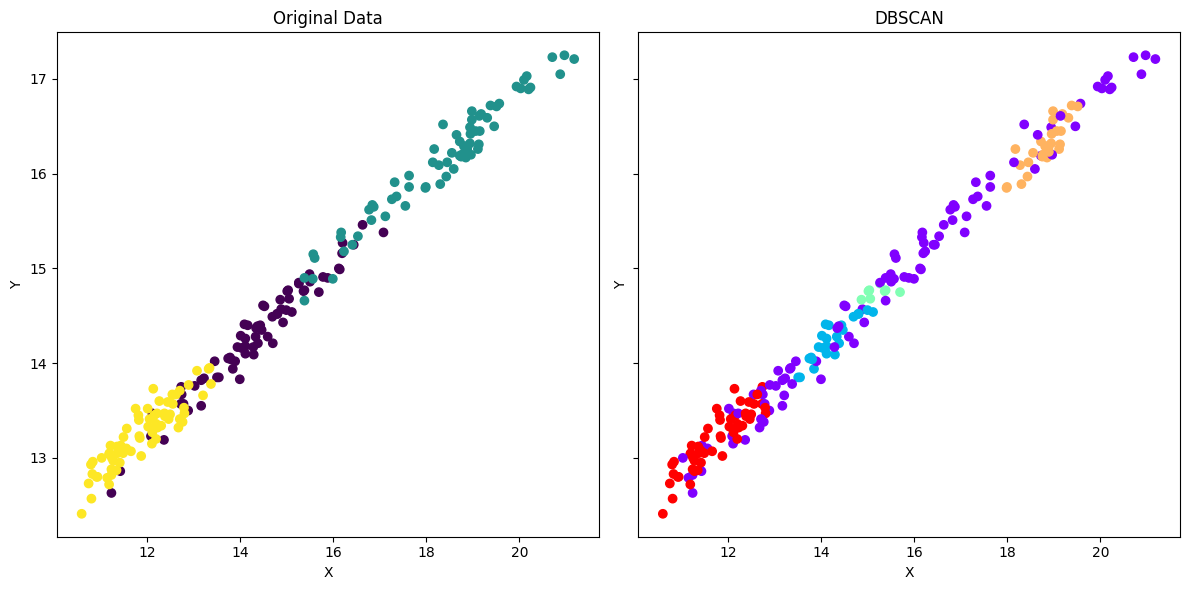

In [27]:
graph( 'DBSCAN', DBSCAN_model)

#Evaluation of DBSCANS

Evaluation for DBSCAN

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.34      0.51        70
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        70
           3       0.00      0.00      0.00         0

    accuracy                           0.11       210
   macro avg       0.20      0.07      0.10       210
weighted avg       0.33      0.11      0.17       210



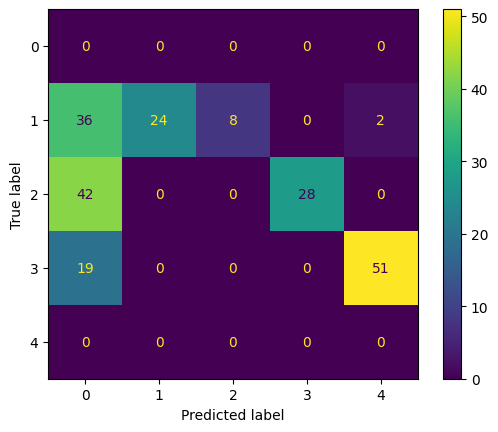

In [28]:
evaluation(y, DBSCAN_model.labels_, 'DBSCAN')

In [29]:
from sklearn.cluster import AgglomerativeClustering
agg_model_E = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage= 'average')

# Fit the model to your data
agg_model_E.fit(X)



AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

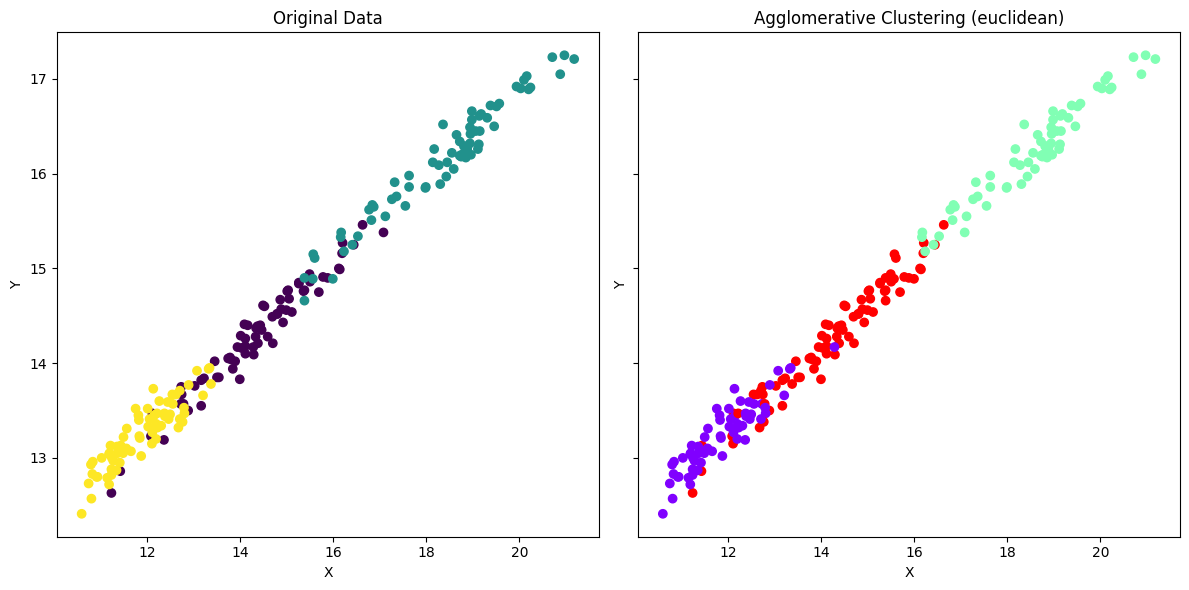

In [30]:
graph('Agglomerative Clustering (euclidean)', agg_model_E)

In [31]:
agg_model_M = AgglomerativeClustering(n_clusters= k, linkage= 'average', metric= 'manhattan')
agg_model_M.fit(X)

AgglomerativeClustering(linkage='average', metric='manhattan', n_clusters=3)

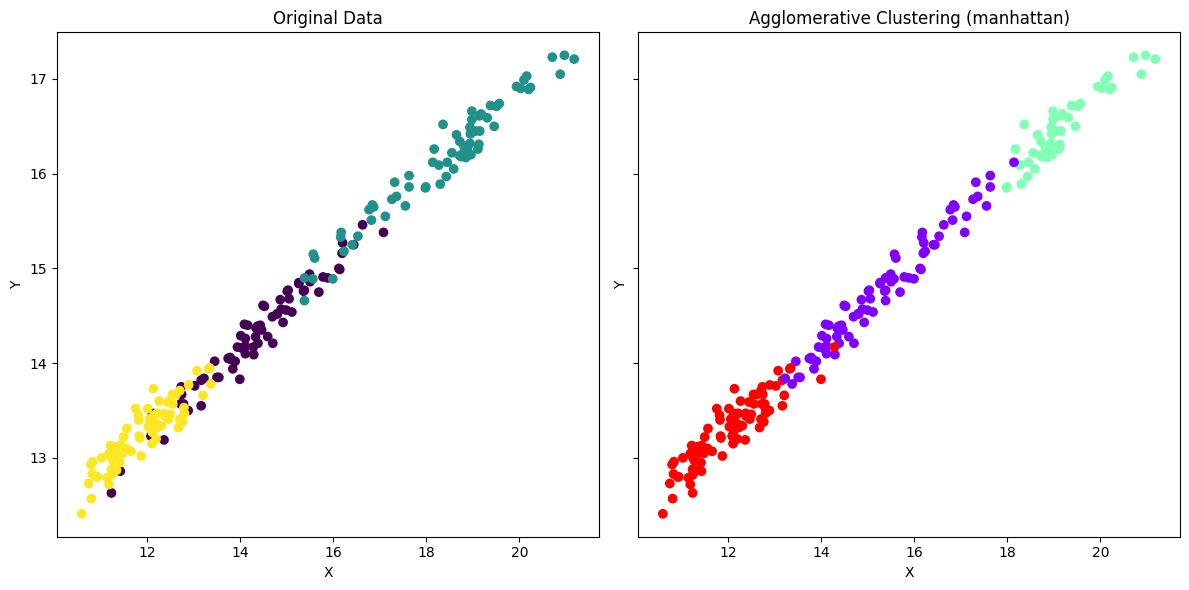

In [32]:
graph('Agglomerative Clustering (manhattan)', agg_model_M)

## Evaluation of Agglomerative Clustering

Evaluation for Agglomerative Clustering (euclidean)

              precision    recall  f1-score   support

           0       0.05      0.04      0.04        70
           1       0.98      0.91      0.95        70
           2       0.11      0.13      0.12        70

    accuracy                           0.36       210
   macro avg       0.38      0.36      0.37       210
weighted avg       0.38      0.36      0.37       210



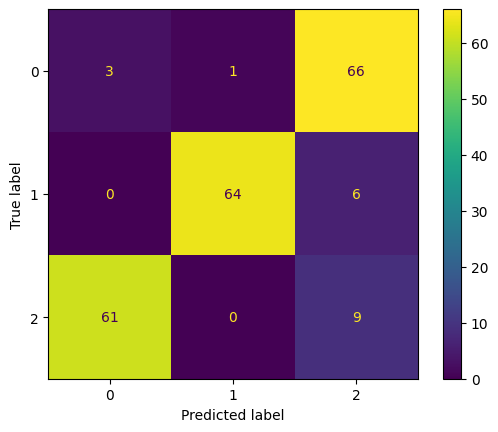

In [33]:
evaluation(y, agg_model_E.labels_, 'Agglomerative Clustering (euclidean)')

Evaluation for Agglomerative Clustering (manhattan)

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        70
           1       1.00      0.67      0.80        70
           2       0.82      0.99      0.90        70

    accuracy                           0.81       210
   macro avg       0.84      0.81      0.81       210
weighted avg       0.84      0.81      0.81       210



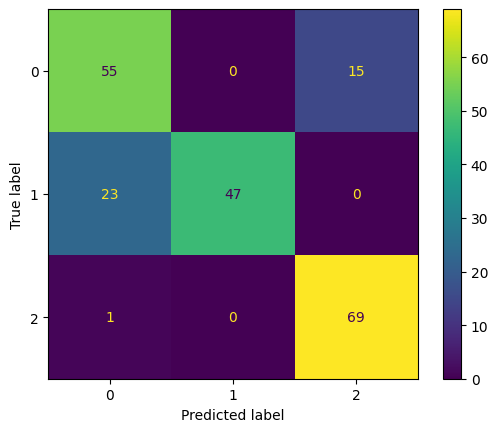

In [34]:
evaluation(y, agg_model_M.labels_, 'Agglomerative Clustering (manhattan)')

2. Add a workflow to calculate the cohesion for each clustering result (Refer to Lesson 8). Which distance measure and clustering methods give you the best results? (2 points)

***Lower Cohesion Value***: Indicates that the data points within each cluster are very close to each other. This is generally considered good as it means that the points in each cluster are similar to each other.

***Higher Cohesion Value***: Indicates that the data points within each cluster are spread out. This is generally considered bad as it means that the points in each cluster are not very similar to each other.

In [35]:
def calculate_cohesion(X, labels):
    cohesion = 0
    for label in set(labels):
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        cohesion += ((cluster_points - centroid) ** 2).sum().sum()
    return cohesion

In [36]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score for K_means {silhouette_score(X, kmeans.predict(X))}')

Silhouette Score for K_means 0.4681390800859686


In [37]:
def calculate_cohesion(X, labels):
    cohesion = 0
    for label in set(labels):
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        cohesion += ((cluster_points - centroid) ** 2).sum().sum()
    return cohesion
calculate_cohesion(X, kmeans.labels_)

588.7819921777436

In [38]:

models = {
    "K-Means": {
        "silhouette": silhouette_score(X, kmeans.predict(X)),
        "cohesion": calculate_cohesion(X, kmeans.labels_)
    },
    "K-Medoids (Euclidean)": {
        "silhouette": silhouette_score(X, kmedoid_E.labels_),
        "cohesion": calculate_cohesion(X, kmedoid_E.labels_)
    },
    "K-Medoids (Manhattan)": {
        "silhouette": silhouette_score(X, kmedoid_M.labels_),
        "cohesion": calculate_cohesion(X, kmedoid_M.labels_)
    },
    "DBSCAN": {
        "silhouette": silhouette_score(X, DBSCAN_model.labels_),
        "cohesion": calculate_cohesion(X, DBSCAN_model.labels_)
    },
    "Agglomerative Clustering (euclidean)": {
        "silhouette": silhouette_score(X, agg_model_E.labels_),
        "cohesion": calculate_cohesion(X, agg_model_E.labels_)
    },
    "Agglomerative Clustering (manhattan)": {
        "silhouette": silhouette_score(X, agg_model_M.labels_),
        "cohesion": calculate_cohesion(X, agg_model_M.labels_)
    }
}


In [39]:
# prompt: put dic in df

results_df = pd.DataFrame.from_dict(models, orient='index')
results_df


silhouette     cohesion
K-Means                                 0.468139   588.781992
K-Medoids (Euclidean)                   0.468139   588.781992
K-Medoids (Manhattan)                   0.463049   598.123314
DBSCAN                                  0.079041  1339.711168
Agglomerative Clustering (euclidean)    0.458112   613.652144
Agglomerative Clustering (manhattan)    0.436856   656.823985

In [40]:

models = {
    "KMeans": silhouette_score(X, kmeans.predict(X)),
    "KMedoids Euclidean": silhouette_score(X, kmedoid_E.predict(X)),
    "KMedoids Manhattan": silhouette_score(X, kmedoid_M.predict(X)),
    "DBSCAN": silhouette_score(X, DBSCAN_model.labels_),
    "Agglomerative Clustering Euclidean": silhouette_score(X, agg_model_E.labels_),
    "Agglomerative Clustering Manhattan": silhouette_score(X, agg_model_M.labels_)
}


In [41]:

df_models = pd.DataFrame.from_dict(models, orient='index', columns=['Silhouette Score'])
display(df_models)


Silhouette Score
KMeans                                      0.468139
KMedoids Euclidean                          0.468139
KMedoids Manhattan                          0.463049
DBSCAN                                      0.079041
Agglomerative Clustering Euclidean          0.458112
Agglomerative Clustering Manhattan          0.436856

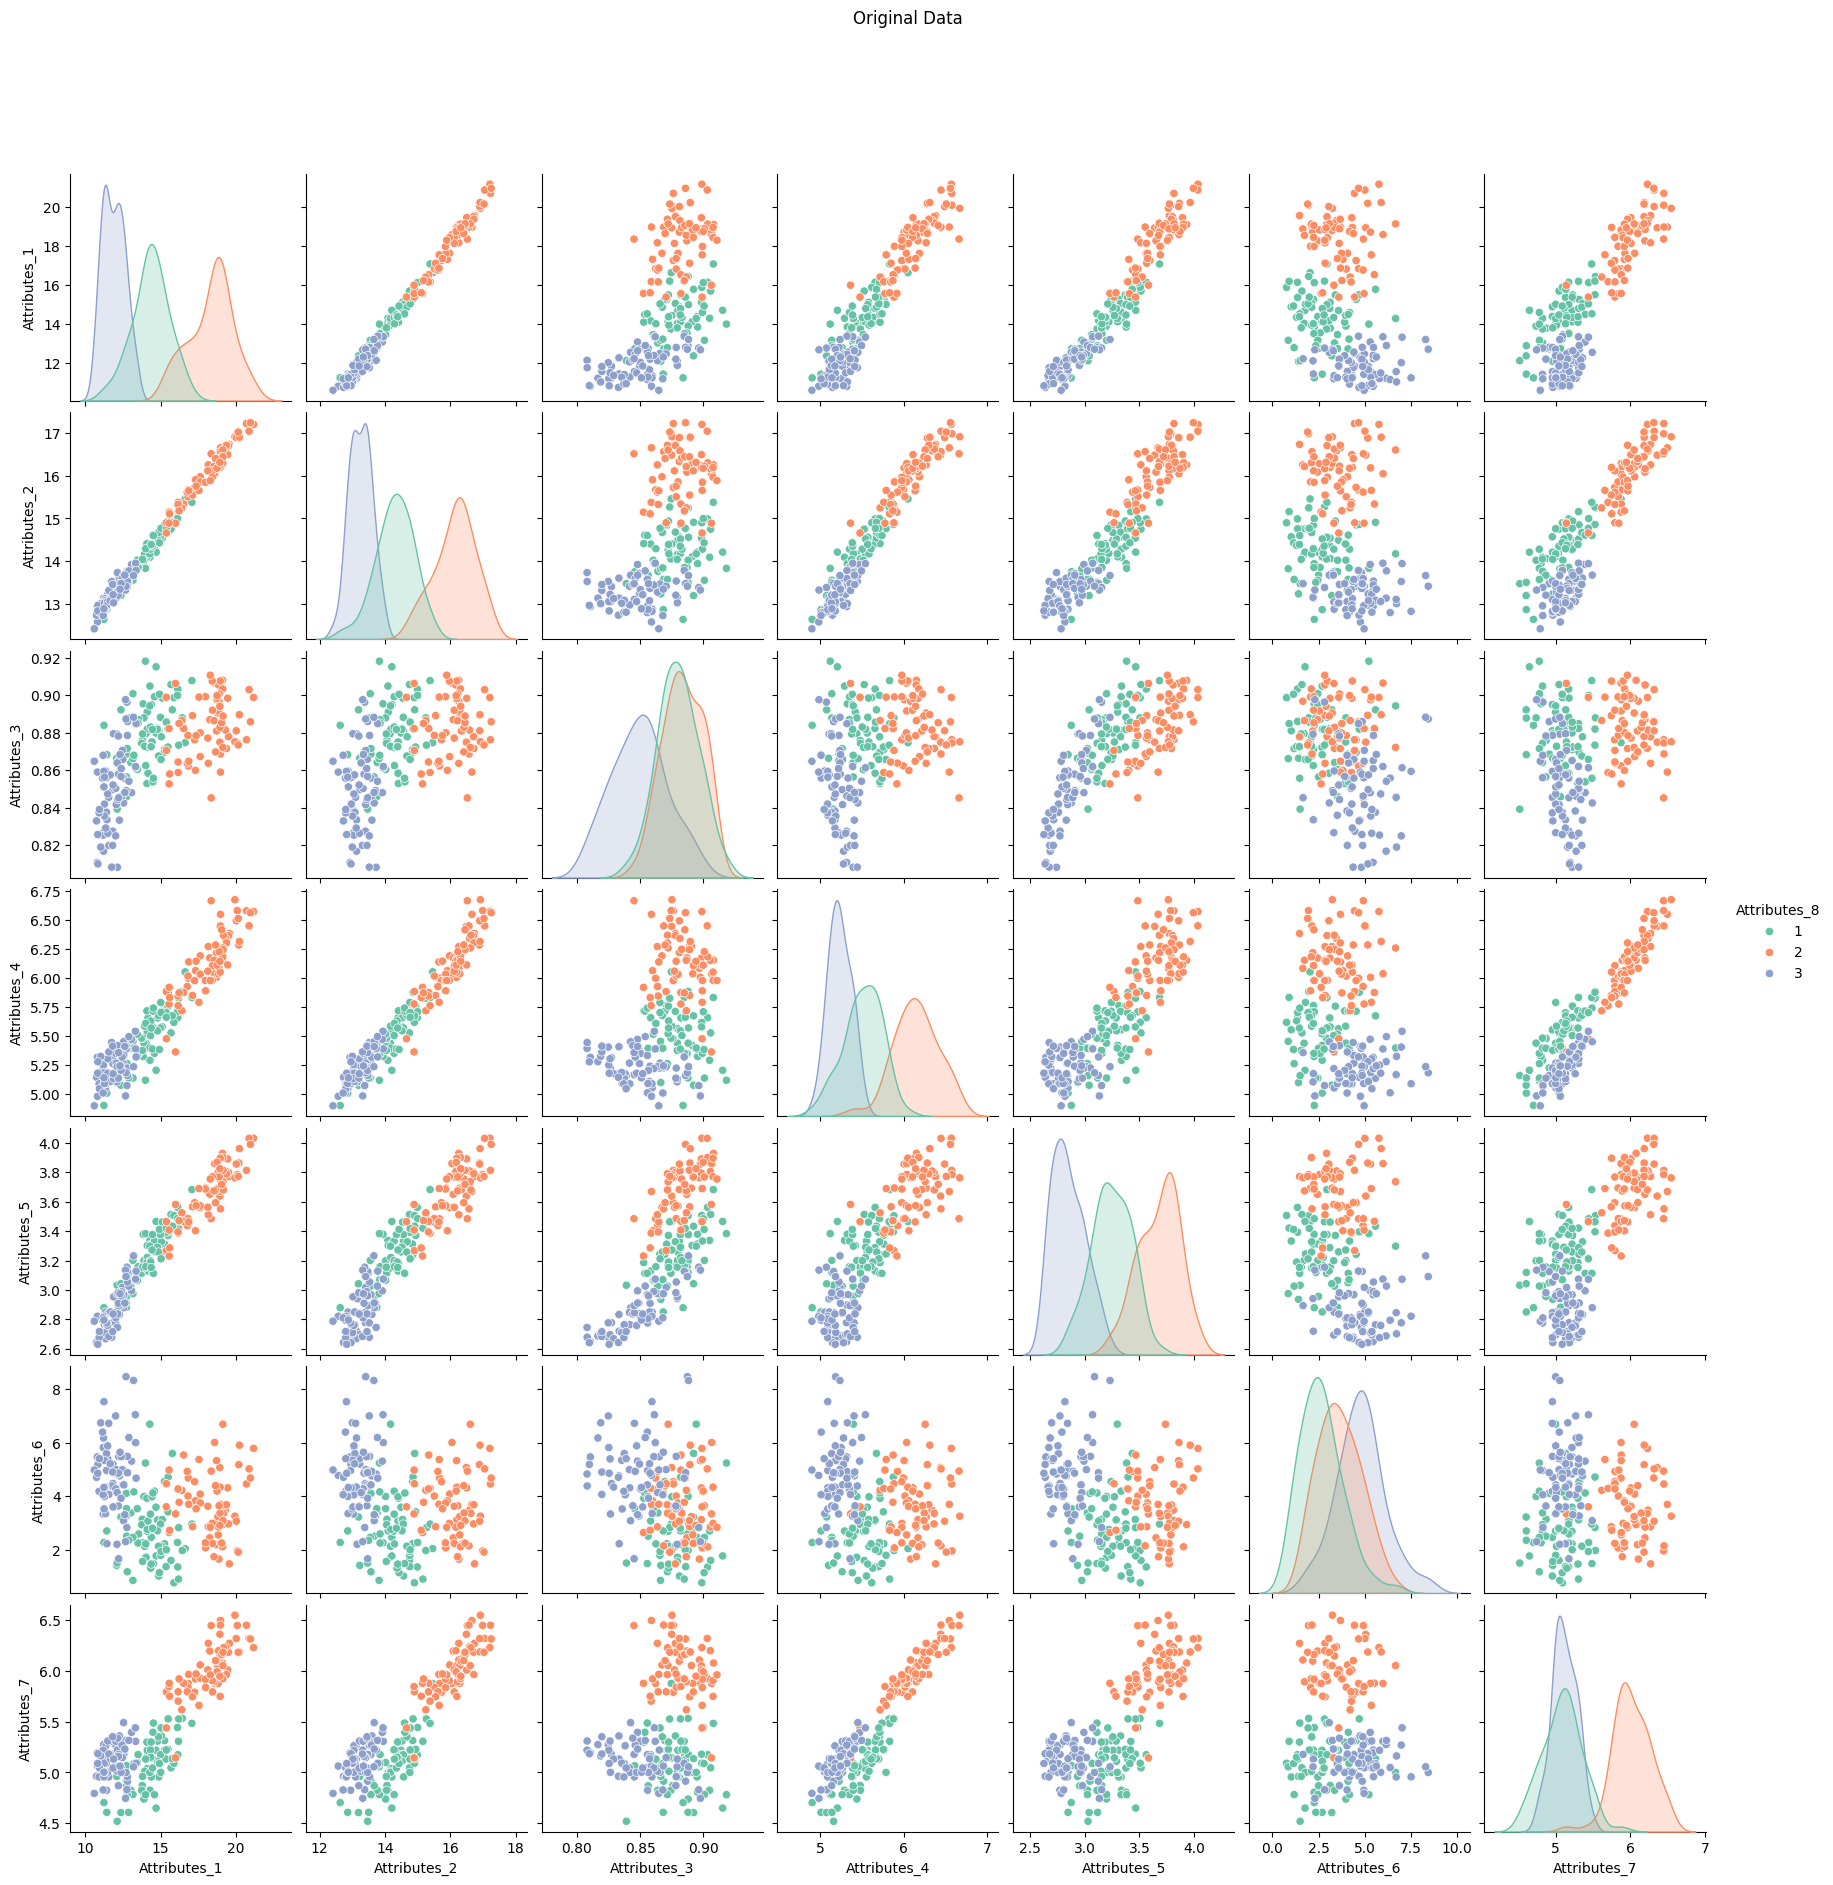

In [42]:
sns.pairplot(df, hue='Attributes_8', palette='Set2').fig.suptitle("Original Data", y=1.08)
plt.show()

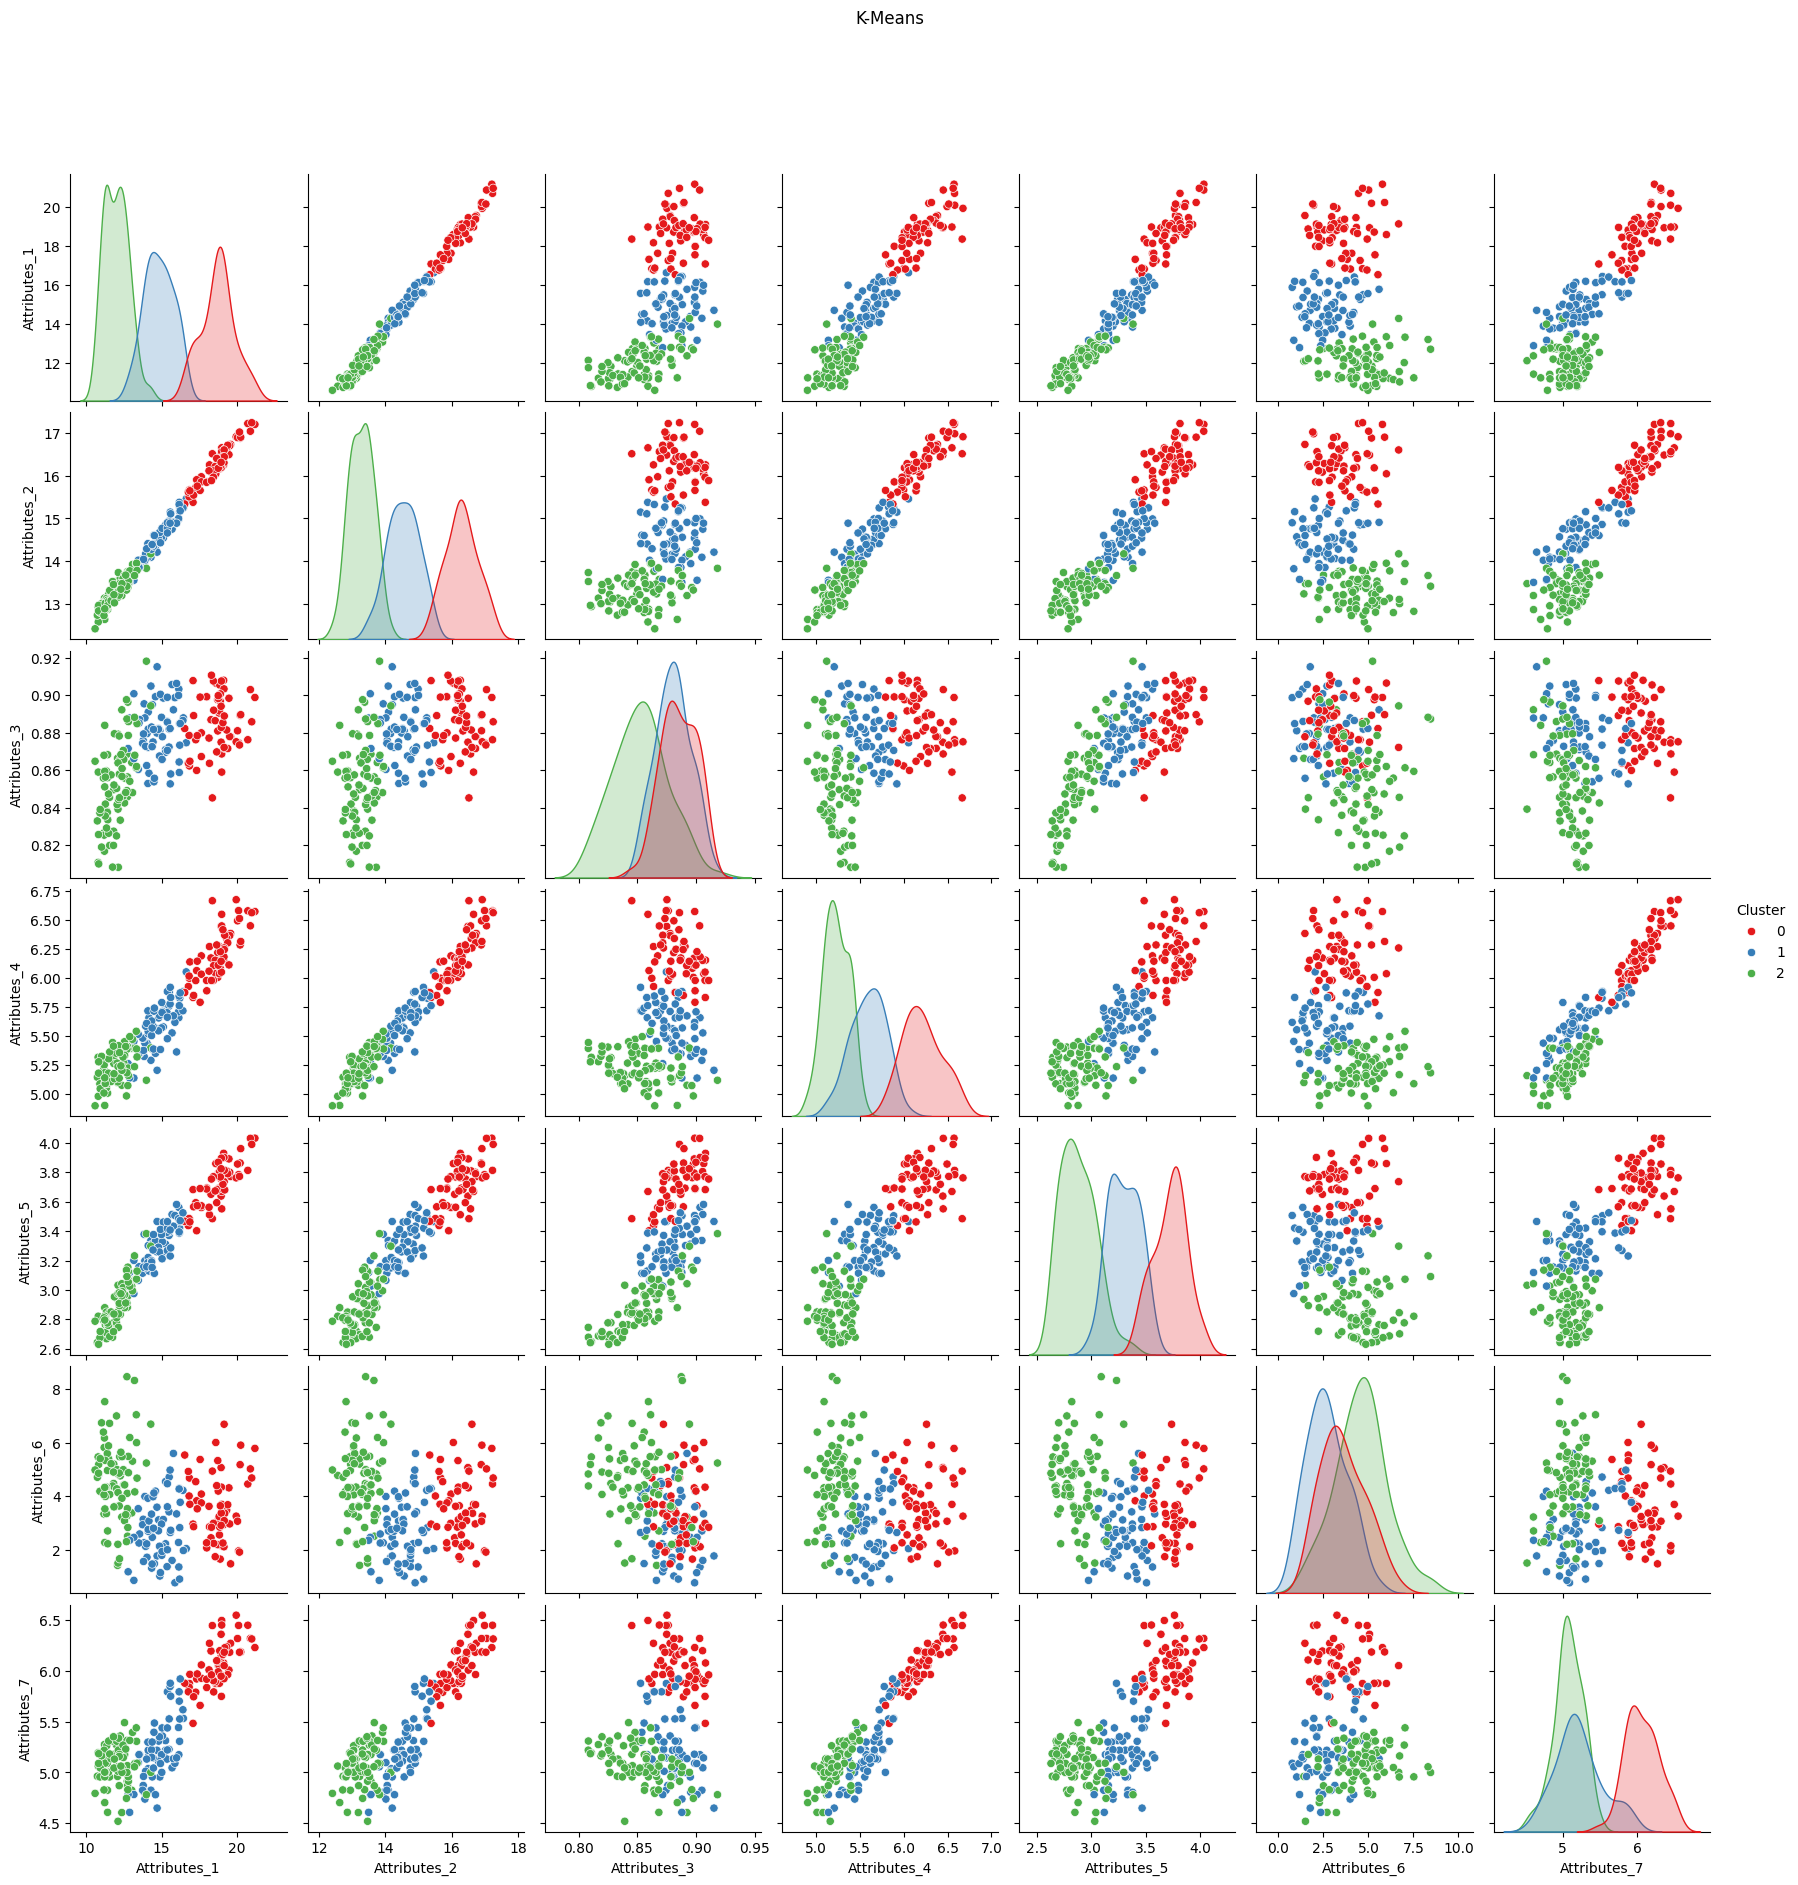

In [43]:


# Convert kmeans.labels_ to a pandas Series
labels = pd.Series(kmeans.labels_, name="Cluster")

# Concatenate labels with the original DataFrame for plotting
df_with_labels = pd.concat([X, labels], axis=1)

# Plotting the pairplot
sns.pairplot(df_with_labels, hue="Cluster", palette='Set1').fig.suptitle("K-Means", y=1.08) # y= some height>1

plt.show()


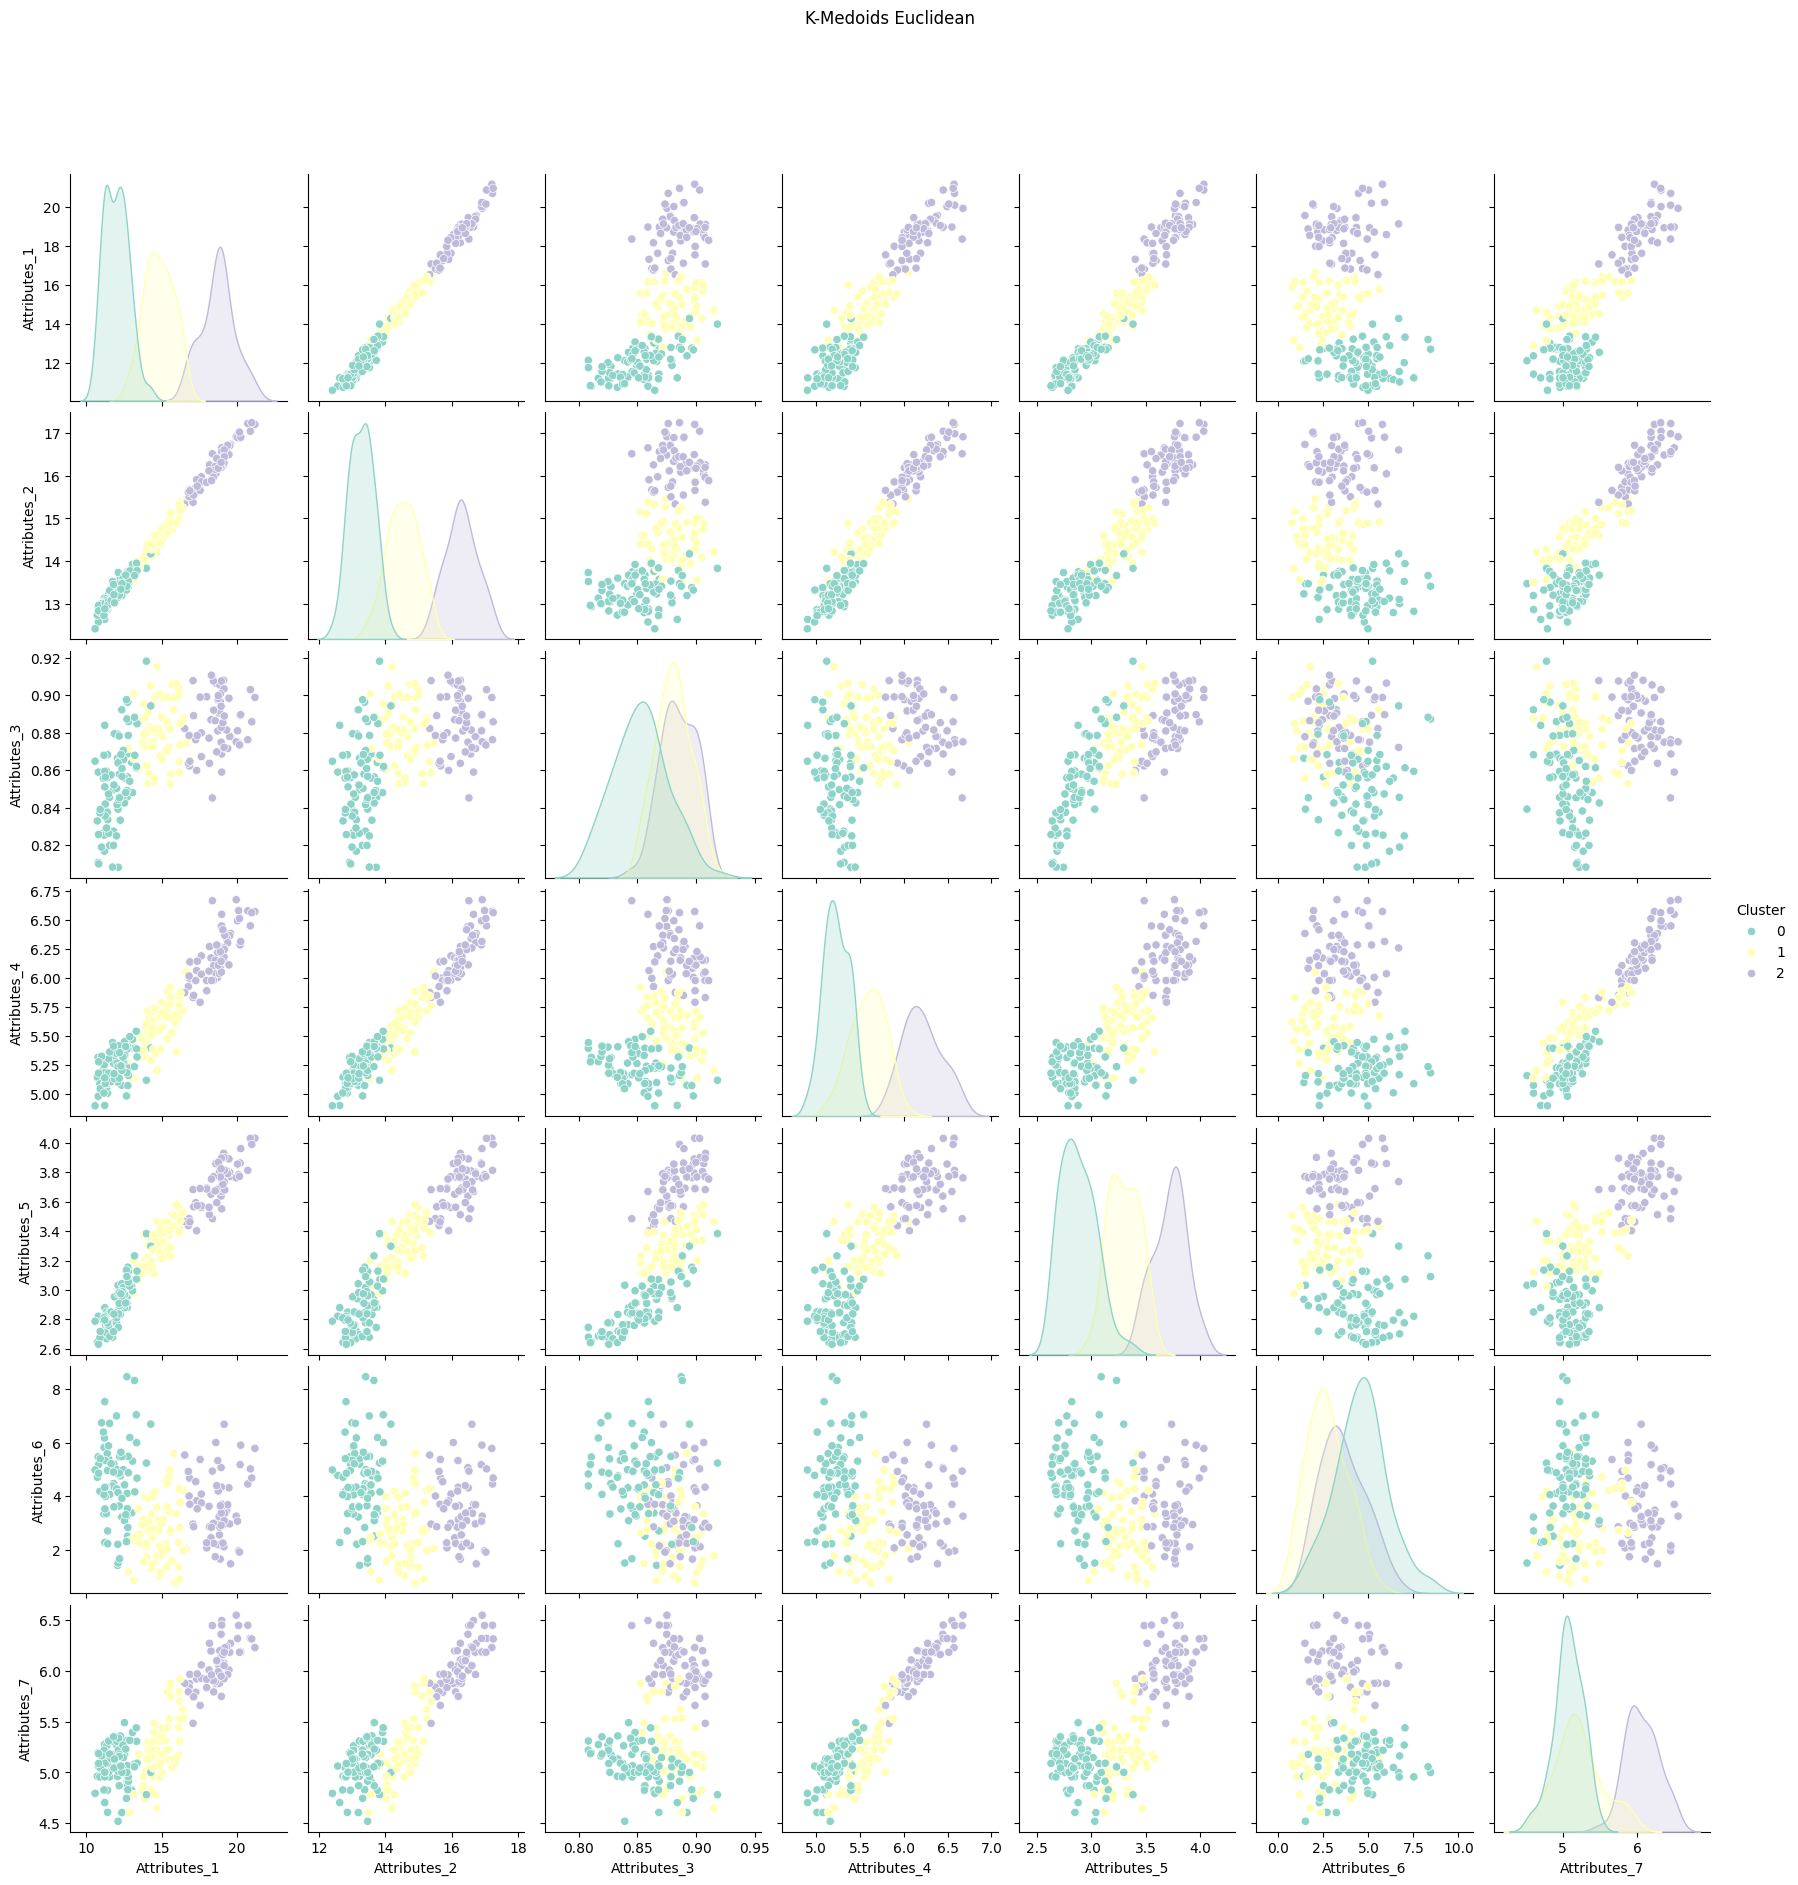

In [44]:

# Convert kmeans.labels_ to a pandas Series
labels = pd.Series(kmedoid_E.labels_, name="Cluster")

# Concatenate labels with the original DataFrame for plotting
df_with_labels = pd.concat([X, labels], axis=1)

# Plotting the pairplot
sns.pairplot(df_with_labels, hue="Cluster", palette='Set3').fig.suptitle("K-Medoids Euclidean", y=1.08) # y= some height>1

plt.show()
